## **PREDIKSI HARGA RUMAH SECOND DI DEPOK**

Dalam konteks dataset, Data yang mencakup kolom-kolom seperti Jumlah Kamar Tidur, Luas Tanah, Luas Bangunan, Jenis Sertifikat Rumah, dan Lokasi Kecamatan, studi ini bertujuan untuk menganalisis faktor yang mempengaruhi harga rumah second di Kota Depok.

Dengan pertumbuhan populasi yang cepat dan meningkatnya permintaan terhadap rumah second, Kota Depok sebagai salah satu kawasan urban yang berkembang di Indonesia, memiliki tantangan dan peluang dalam pasar real estate, terutama untuk segmen rumah second.

Dengan memanfaatkan data historis harga rumah second di Depok, model prediksi harga rumah second dapat dikembangkan untuk mengidentifikasi pola atau tren yang mungkin memengaruhi nilai jual di pasar.

Tujuan utama dari penelitian ini adalah memberikan panduan kepada pemilik rumah, calon pembeli, dan agen properti dalam menentukan harga rumah second yang sesuai dengan tren harga saat ini.



In [ ]:
# Import library yang diperlukan

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **J.62DMI00.001.1 - Mengumpulkan Data**


Mengumpulkan dataset mengenai harga rumah second di Depok, yang mencakup variabel-variabel seperti jumlah kamar tidur, luas tanah, luas bangunan, jenis sertifikat rumah, dan lokasi kecamatan

Dataset didapatkan dengan melakukan web scraping website pinhome.id

In [ ]:
# Load dataset

df = pd.read_excel('Data.xlsx')
df.head()

,kamar_tidur,luas_tanah,luas_bangunan,sertifikat,lokasi,harga
0,5,84,100,Sertifikat Hak Milik,Beji,1.000000e+09
1,4,93,130,Sertifikat Hak Milik,Beji,1.500000e+09
2,2,99,75,Sertifikat Hak Milik,Beji,8.750000e+08
3,3,90,80,Sertifikat Hak Milik,Beji,1.100000e+09
4,3,79,140,Sertifikat Hak Milik,Beji,9.500000e+08


In [ ]:
# Ukuran dataset

df.shape

(4405, 6)

Ukuran data yaitu jumlah baris sebanyak 4405 baris dan jumlah kolom sebanyak 6 kolom

## **J.62DMI00.010.1 - Menentukan Label Data**


Menentukan label data sebagai variabel Harga, yang merupakan harga rumah second

In [ ]:
# Menampilkan nama kolom (features atau variabel)

df.columns

Index(['kamar_tidur', 'luas_tanah', 'luas_bangunan', 'sertifikat', 'lokasi',
       'harga'],
      dtype='object')

## **J.62DMI00.007.1 - Menentukan Objek Data**


Objek data meliputi informasi tentang jumlah kamar tidur, luas tanah, luas bangunan, jenis sertifikat rumah, dan lokasi kecamatan

In [ ]:
# Menampilkan data 5 baris teratas

df.head()

,kamar_tidur,luas_tanah,luas_bangunan,sertifikat,lokasi,harga
0,5,84,100,Sertifikat Hak Milik,Beji,1.000000e+09
1,4,93,130,Sertifikat Hak Milik,Beji,1.500000e+09
2,2,99,75,Sertifikat Hak Milik,Beji,8.750000e+08
3,3,90,80,Sertifikat Hak Milik,Beji,1.100000e+09
4,3,79,140,Sertifikat Hak Milik,Beji,9.500000e+08


In [ ]:
# Informasi umum tentang dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4405 entries, 0 to 4404
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kamar_tidur    4405 non-null   int64  
 1   luas_tanah     4405 non-null   int64  
 2   luas_bangunan  4405 non-null   int64  
 3   sertifikat     4167 non-null   object 
 4   lokasi         4405 non-null   object 
 5   harga          4405 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 206.6+ KB


## **J.62DMI00.005.1 - Menelaah Data**


Melakukan eksplorasi data untuk memahami pola harga rumah, hubungan antara variabel, dll.

Visualisasi data dengan scatter plot untuk melihat hubungan antara harga rumah dan variabel-variabel lainnya.


In [ ]:
# Menampilkan statistik deskriptif

df.describe().T

,count,mean,std,min,25%,50%,75%,max
kamar_tidur,4405.0,3.021339e+00,2.272331e+00,1.0,2.0,3.0,3.000000e+00,4.000000e+01
luas_tanah,4405.0,1.255428e+02,1.769259e+02,14.0,60.0,80.0,1.200000e+02,6.045000e+03
luas_bangunan,4405.0,1.095035e+02,1.057229e+02,18.0,48.0,72.0,1.240000e+02,1.000000e+03
harga,4405.0,1.395586e+09,2.028051e+09,20000000.0,550000000.0,815000000.0,1.500000e+09,5.130000e+10


In [ ]:
# Mengetahui korelasi variabel numerik dengan target
# Mengabaikan kolom 'sertifikat' dan 'lokasi' untuk korelasi

numeric_data = df.drop(['sertifikat', 'lokasi'], axis=1)


<Axes: >

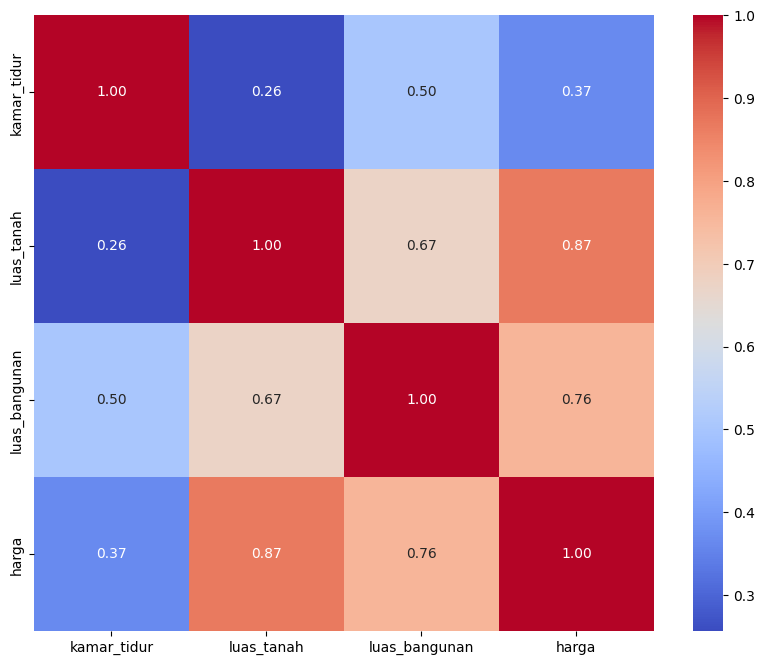

In [ ]:
# Korelasi antar variabel dengan correlation matrix

correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

Terlihat bahwa harga rumah second sangat dipengaruhi oleh luas tanah dan luas bangunan.

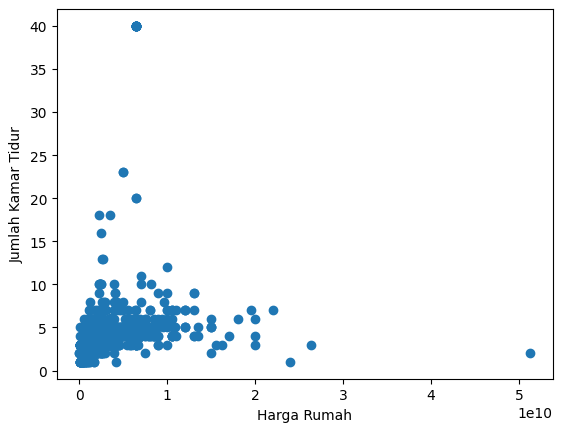

In [ ]:
# Menampilkan scatter plot harga rumah dan jumah kamar tidur

plt.scatter(df['harga'], df['kamar_tidur'])
plt.xlabel("Harga Rumah")
plt.ylabel("Jumlah Kamar Tidur")
plt.show()

Berdasarkan tampilan visual pada scatter plot, terlihat bahwa terdapat outlier

In [ ]:
df.query("kamar_tidur > 25")

,kamar_tidur,luas_tanah,luas_bangunan,sertifikat,lokasi,harga
63,40,300,500,Sertifikat Hak Milik,Beji,6.500000e+09
101,40,300,500,Sertifikat Hak Milik,Beji,6.500000e+09
136,40,300,500,Sertifikat Hak Milik,Beji,6.500000e+09
153,40,300,500,Sertifikat Hak Milik,Beji,6.500000e+09
259,40,300,500,Sertifikat Hak Milik,Beji,6.500000e+09
260,40,300,500,Sertifikat Hak Milik,Beji,6.500000e+09
266,40,300,500,Sertifikat Hak Milik,Beji,6.500000e+09
343,40,300,500,Sertifikat Hak Milik,Beji,6.500000e+09
378,40,300,500,Sertifikat Hak Milik,Beji,6.500000e+09
1359,40,300,500,Sertifikat Hak Milik,Cimanggis,6.500000e+09


Terdapat 10 data outlier, dimana terdapat 10 rumah yang memiliki kamar tidur berjumlah 40 kamar

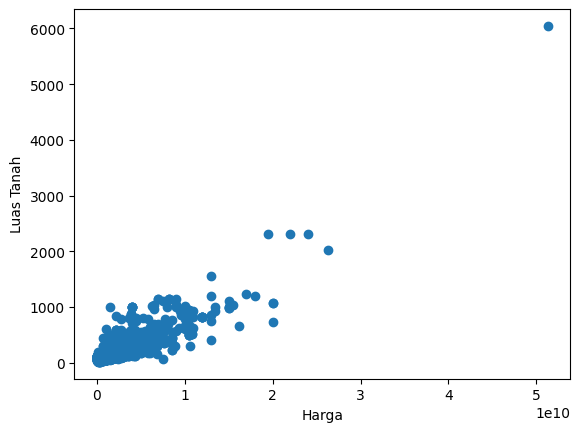

In [ ]:
# Menampilkan scatter plot harga rumah dan luas tanah

plt.scatter(df['harga'], df['luas_tanah'])
plt.xlabel("Harga")
plt.ylabel("Luas Tanah")
plt.show()

Berdasarkan tampilan visual pada scatter plot, terlihat bahwa terdapat korelasi linier antara harga dengan luas tanah

Terlihat terdapat 5 titik outlier

In [ ]:
df.query("luas_tanah > 2000")

,kamar_tidur,luas_tanah,luas_bangunan,sertifikat,lokasi,harga
22,3,2030,200,Sertifikat Hak Milik,Beji,2.630000e+10
2642,7,2310,692,NaN,Limo,1.950000e+10
2774,7,2310,450,Sertifikat Hak Milik,Limo,2.200000e+10
2928,1,2304,355,Sertifikat Hak Milik,Pancoran Mas,2.400000e+10
3812,2,6045,600,Sertifikat Hak Milik,Sukmajaya,5.130000e+10


Terdapat 5 data yang memiliki luas tanah diatas 2000

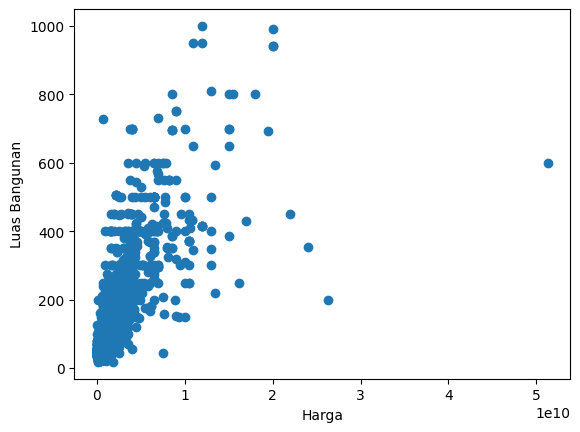

In [ ]:
# Menampilkan scatter plot harga rumah dan luas bangunan

plt.scatter(df['harga'], df['luas_bangunan'])
plt.xlabel("Harga")
plt.ylabel("Luas Bangunan")
plt.show()

Berdasarkan tampilan visual pada scatter plot, terlihat bahwa terdapat korelasi linier antara harga dengan luas bangunan

Terlihat terdapat 1 titik outlier

In [ ]:
df.query("harga > 5.000000e+10")

,kamar_tidur,luas_tanah,luas_bangunan,sertifikat,lokasi,harga
3812,2,6045,600,Sertifikat Hak Milik,Sukmajaya,5.130000e+10


Text(0.5, 1.0, 'Distribusi Kamar Tidur')

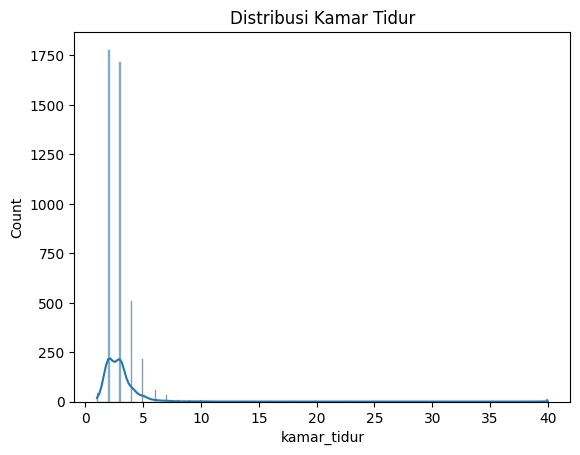

In [ ]:
# Histogram Kamar Tidur

sns.histplot(df['kamar_tidur'], kde=True)
plt.title('Distribusi Kamar Tidur')

Text(0.5, 1.0, 'Distribusi Luas Tanah')

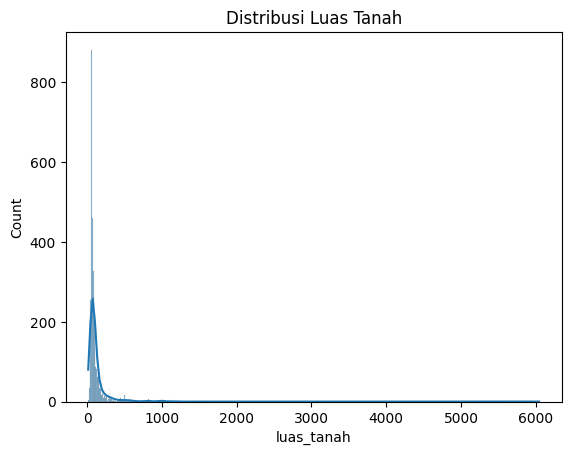

In [ ]:
# Histogram Luas Tanah

sns.histplot(df['luas_tanah'], kde=True)
plt.title('Distribusi Luas Tanah')

Text(0.5, 1.0, 'Distribusi Luas Bangunan')

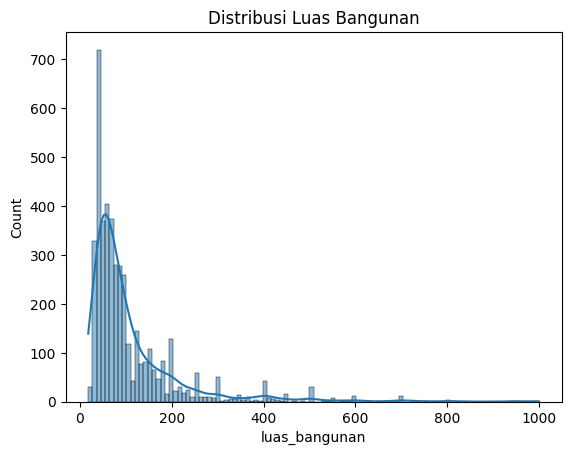

In [ ]:
# Histogram Luas Bangunan

sns.histplot(df['luas_bangunan'], kde=True)
plt.title('Distribusi Luas Bangunan')

Text(0.5, 1.0, 'Distribusi Harga')

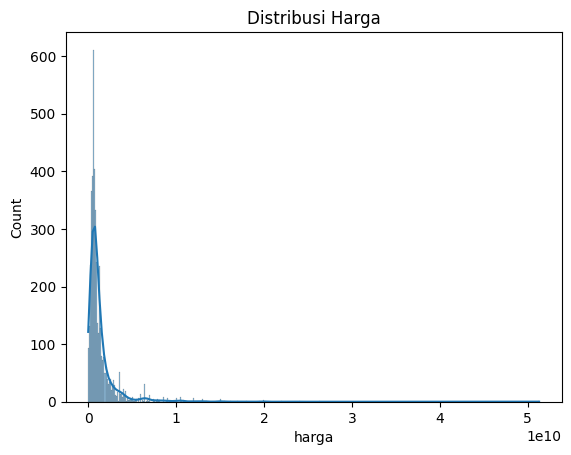

In [ ]:
sns.histplot(df['harga'], kde=True)
plt.title('Distribusi Harga')

In [ ]:
df.query("harga < 100000000").sort_values(by='harga', ascending=False)

,kamar_tidur,luas_tanah,luas_bangunan,sertifikat,lokasi,harga
3985,3,80,66,NaN,Sukmajaya,98000000.0
807,3,98,60,NaN,Cilodong,98000000.0
1114,3,90,77,NaN,Cilodong,98000000.0
1113,2,87,45,Sertifikat Hak Milik,Cilodong,98000000.0
3982,3,115,70,NaN,Sukmajaya,98000000.0
...,...,...,...,...,...,...
4226,3,105,100,NaN,Tapos,32000000.0
1171,2,81,40,Sertifikat Hak Milik,Cilodong,29000000.0
3508,2,60,67,Sertifikat Hak Milik,Sawangan,27000000.0
2302,2,41,32,Sertifikat Hak Milik,Cipayung,25000000.0


Cek https://www.pinhome.id/dijual/rumah-sekunder/cari/kec-sukmajaya-1796/dibawah/100-juta


Kebanyakan rumah dengan harga di bawah 100 juta merupakan rumah over kredit. Hal ini menyebabkan harga rumah tersebut dapat lebih murah dibandingkan rumah lain yang memiliki spesifikasi serupa

Text(0.5, 1.0, 'Jumlah Sertifikat')

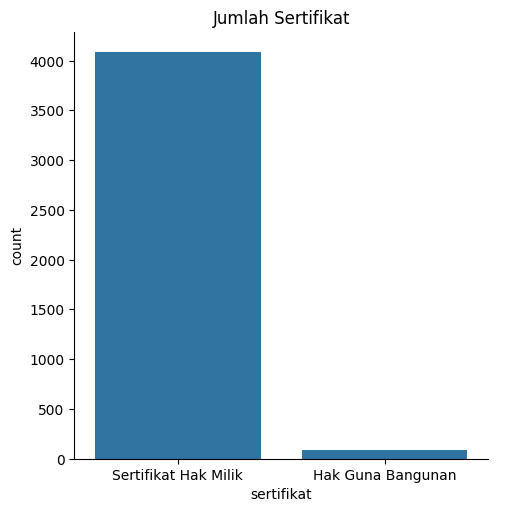

In [ ]:
# Visualisasi distribusi setiap kategori dalam kolom sertifikat

sns.catplot(data=df, x='sertifikat', kind='count')
plt.title('Jumlah Sertifikat')

Text(0.5, 1.0, 'Jumlah Kecamatan')

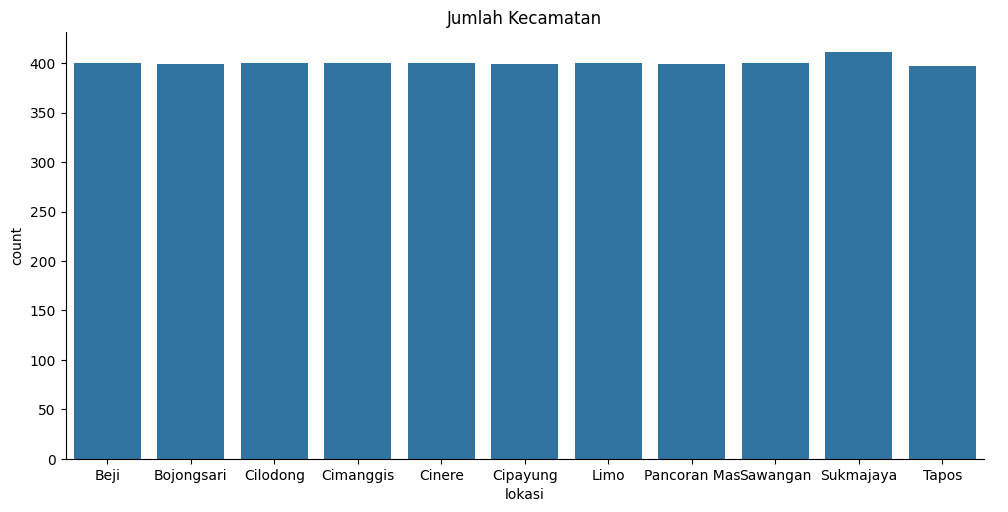

In [ ]:
# Visualisasi distribusi setiap kategori dalam kolom Kecamatan

sns.catplot(data=df, x='lokasi', kind='count', aspect=2)
plt.title('Jumlah Kecamatan')

In [ ]:
# Melihat rata-rata harga rumah second per kecamatan

grouped_df = df.groupby(['lokasi']).agg(harga_rata_rata=('harga', 'mean')).sort_values(by='harga_rata_rata', ascending=False)
grouped_df

,harga_rata_rata
lokasi,
Cinere,3.689572e+09
Beji,1.919022e+09
Sukmajaya,1.747300e+09
Cimanggis,1.741355e+09
Limo,1.407995e+09
Pancoran Mas,1.079715e+09
Tapos,9.182207e+08
Bojongsari,8.060145e+08
Cilodong,7.697875e+08


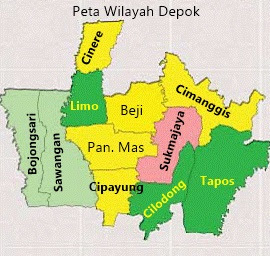

4 dari 5 Kecamatan dengan harga rata-rata rumah second tertinggi di depok (Cinere, Beji, Cimanggis, dan Limo) memiliki letak yang bersebelahan dengan Jakarta Selatan

## **J.62DMI00.006.1 - Memvalidasi Data**


Memeriksa integritas data untuk memastikan tidak ada nilai yang hilang atau tidak valid

In [ ]:
# Memeriksa missing values

df.isnull().sum()

,0
kamar_tidur,0
luas_tanah,0
luas_bangunan,0
sertifikat,238
lokasi,0
harga,0


In [ ]:
# Memeriksa data duplikat

df.duplicated().sum()

914

## **J.62DMI00.008.1 - Membersihkan Data**


Metode/cara penyiapan dan pembersihan data yang dilakukan adalah menghapus nilai kosong, menghapus data duplikat, dan menghapus nilai outlier

Menghapus nilai kosong

In [ ]:
df = df.dropna()
df.isnull().sum()

,0
kamar_tidur,0
luas_tanah,0
luas_bangunan,0
sertifikat,0
lokasi,0
harga,0


Menghapus data duplikat

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

0

Menghapus nilai outlier

In [ ]:
index_outliers = [22, 63, 1359, 2774, 2928, 3005, 3812]

In [ ]:
df = df.drop(index = index_outliers)

In [ ]:
df = df.drop(df.query("harga < 100000000").index)

In [ ]:
df.shape

(3228, 6)

## **J.62DMI00.009.1 - Mengkonstruksi Data**


- Melakukan normalisasi data (karena perbedaan nilai data yang sangat jauh)

- Melakukan encoding data (agar model memahami data kategori)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
# Pipeline untuk preprocessing fitur numerik
numerical_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

# Pipeline untuk preprocessing fitur kategorikal
categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder())
])


In [ ]:
# Menggabungkan pipeline untuk preprocessing fitur numerik dan kategorikal

preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, ['kamar_tidur', 'luas_tanah', 'luas_bangunan']),
    ('categorical', categorical_pipeline, ['sertifikat', 'lokasi'])
])

In [ ]:
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['kamar_tidur', 'luas_tanah',
                                  'luas_bangunan']),
                                ('categorical',
                                 Pipeline(steps=[('onehot', OneHotEncoder())]),
                                 ['sertifikat', 'lokasi'])])

## **J.62DMI00.013.1 - Membangun Model**


Membangun model regresi untuk memprediksi harga rumah second berdasarkan variabel-variabel yang ada

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
# Memilih fitur X (variabel independen) dan target y (variabel dependen)

X = df.drop('harga', axis=1)
y = df['harga']

In [ ]:
# Memisahkan data menjadi data latih (training data) dan data uji (test data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2582, 5), (646, 5), (2582,), (646,))

In [ ]:
# Membuat pipeline penghubung preprocessor dengan algoritma machine learning

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LinearRegression())
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['kamar_tidur', 'luas_tanah',
                                                   'luas_bangunan']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['sertifikat', 'lokasi'])])),
                ('algo', LinearRegression())])

In [ ]:
# Membuat prediksi dengan data uji

y_pred = pipeline.predict(X_test)

In [ ]:
print(y_pred[33])              # nilai harga rumah hasil prediksi
print(y.iloc[33])              # nilai data harga rumah asli

545259520.0
580000000.0


**Uji Coba Model**



In [ ]:
coba = pd.DataFrame({
    'kamar_tidur': [2],
    'luas_tanah': [72],
    'luas_bangunan': [144],
    'sertifikat': ['Sertifikat Hak Milik'],
    'lokasi': ['Cinere']
})

coba

,kamar_tidur,luas_tanah,luas_bangunan,sertifikat,lokasi
0,2,72,144,Sertifikat Hak Milik,Cinere


In [ ]:
prediksi = pipeline.predict(coba)
prediksi

array([1.97132288e+09])

In [ ]:
# Melihat koefisien dan intercept

model = pipeline.named_steps['algo']

coefficients = model.coef_
intercept = model.intercept_

print("Koefisien:", coefficients)
print("Intercept:", intercept)

Koefisien: [3.89632164e+07 8.88275915e+09 6.99403521e+09 1.88529264e+22
 1.88529264e+22 1.79267315e+21 1.79267315e+21 1.79267315e+21
 1.79267315e+21 1.79267315e+21 1.79267315e+21 1.79267315e+21
 1.79267315e+21 1.79267315e+21 1.79267315e+21 1.79267315e+21]
Intercept: -2.064559957125384e+22


In [ ]:
feature_names = pipeline.named_steps['prep'].get_feature_names_out()
print("Fitur :", feature_names)


Fitur : ['numerical__kamar_tidur' 'numerical__luas_tanah'
 'numerical__luas_bangunan' 'categorical__sertifikat_Hak Guna Bangunan'
 'categorical__sertifikat_Sertifikat Hak Milik' 'categorical__lokasi_Beji'
 'categorical__lokasi_Bojongsari' 'categorical__lokasi_Cilodong'
 'categorical__lokasi_Cimanggis' 'categorical__lokasi_Cinere'
 'categorical__lokasi_Cipayung' 'categorical__lokasi_Limo'
 'categorical__lokasi_Pancoran Mas' 'categorical__lokasi_Sawangan'
 'categorical__lokasi_Sukmajaya' 'categorical__lokasi_Tapos']


Harga rumah second di Depok dipengaruhi dari data numerical dengan urutan yaitu luas tanah, luas bangunan, dan kamar tidur. data categorical dengan urutan yaitu sertifikat kemudian lokasi

## **J.62DMI00.014.1 - Mengevaluasi Hasil Pemodelan**



5. Hasil pemodelan

In [ ]:
# Evaluasi performa model Regresi Linear
mse_regresi_linear = mean_squared_error(y_test, y_pred)
rmse_regresi_linear = np.sqrt(mse_regresi_linear)
r2_regresi_linear = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f'Mean Squared Error: {mse_regresi_linear}')
print(f'Root Mean Squared Error: {rmse_regresi_linear}')
print(f'R-squared: {r2_regresi_linear}')

Mean Squared Error: 7.100588058844384e+17
Root Mean Squared Error: 842649871.4676448
R-squared: 0.7738667583969143


6. Cara analisis/interpretasi hasil pemodelan

*   Mean Squared Error (MSE) : Nilai MSE model sebesar 7.100588058844384e+17 menunjukkan bahwa terdapat error yang signifikan antara nilai prediksi dan nilai aktual dalam skala besar

*   Root Mean Squared Error (RMSE) : Nilai RMSE model sebesar 842649871.4676448 menunjukkan bahwa rata-rata deviasi prediksi model terhadap harga rumah aktual adalah sekitar 842 juta rupiah. Hal ini bisa menjadi indikator bahwa model belum sepenuhnya akurat.

*   R-squared : Nilai R-squared model sebesar 0.77 menunjukkan bahwa model mampu menjelaskan sekitar 77.4% dari variasi harga rumah second di Depok. Namun, ada sekitar 22.6% variasi yang tidak dijelaskan oleh model.


Hasil model lain :

1. Regresi Polinomial orde 2

*   Mean Squared Error: 7.535605195980686e+17
*   Root Mean Squared Error: 868078636.759406
*   R-squared: 0.7600127177796734

2. Ridge Regression

*   Mean Squared Error: 7.133338618656124e+17
*   Root Mean Squared Error: 844590943.5138483
*   R-squared: 0.772823747565534

3. Lasso Regression

*   Mean Squared Error: 7.10382507218276e+17
*   Root Mean Squared Error: 842841923.0308113
*   R-squared: 0.773763668862181

4. Elastic Net

*   Mean Squared Error: 2.7889517527065324e+18
*   Root Mean Squared Error: 1670015494.7504327
*   R-squared: 0.11179933931165498

5. Support Vector Regression

*   Mean Squared Error: 3.447881649925239e+18
*   Root Mean Squared Error: 1856847233.8685374
*   R-squared: -0.0980508201573973




